In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# checking for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [10]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
# one hot encoding categorical columns

df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Exited'])
y = df['Exited']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
X_test.shape

(2000, 11)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled.shape

(8000, 11)

In [17]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled.shape

(2000, 11)

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()
model.add(Dense(11, activation='sigmoid', input_dim = 11))
model.add(Dense(11, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [36]:
history = model.fit(X_train_scaled, y_train, batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 4ms/step - loss: 0.3310 - accuracy: 0.8641 - val_loss: 0.3316 - val_accuracy: 0.8600
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3305 - accuracy: 0.8659 - val_loss: 0.3328 - val_accuracy: 0.8556
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8644 - val_loss: 0.3328 - val_accuracy: 0.8569
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8652 - val_loss: 0.3337 - val_accuracy: 0.8556
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8633 - val_loss: 0.3339 - val_accuracy: 0.8556
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.3304 - accuracy: 0.8642 - val_loss: 0.3339 - val_accuracy: 0.8544
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8647 - val_loss: 0.3335 - val_accuracy: 0.8550

In [37]:
history.history

{'loss': [0.33101341128349304,
  0.3304809629917145,
  0.3302922546863556,
  0.33074498176574707,
  0.3303159475326538,
  0.3303942382335663,
  0.32971474528312683,
  0.32939866185188293,
  0.329880028963089,
  0.3293687701225281,
  0.32923081517219543,
  0.32909199595451355,
  0.32882100343704224,
  0.32885414361953735,
  0.32859334349632263,
  0.3283807337284088,
  0.32848846912384033,
  0.3286895453929901,
  0.32831183075904846,
  0.3283458948135376,
  0.3277607858181,
  0.32787612080574036,
  0.3279241919517517,
  0.3277278542518616,
  0.327615886926651,
  0.32752183079719543,
  0.3272811770439148,
  0.32725316286087036,
  0.32698413729667664,
  0.32703277468681335,
  0.3269116282463074,
  0.326782763004303,
  0.3264863193035126,
  0.32669487595558167,
  0.32687339186668396,
  0.3265661895275116,
  0.32650652527809143,
  0.32604843378067017,
  0.32601651549339294,
  0.3262682259082794,
  0.3263620138168335,
  0.3261427581310272,
  0.3260384500026703,
  0.3257709741592407,
  0.32543

In [38]:
y_log = model.predict(X_test_scaled)
y_log.shape

63/63 [==============================] - 0s 1ms/step


(2000, 1)

In [39]:
y_pred = np.where(y_log>0.5, 1, 0)

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8625

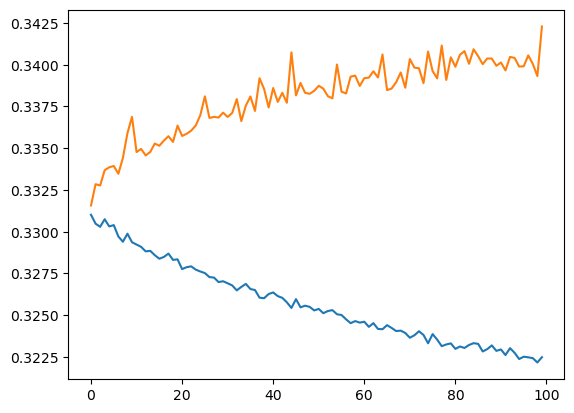

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

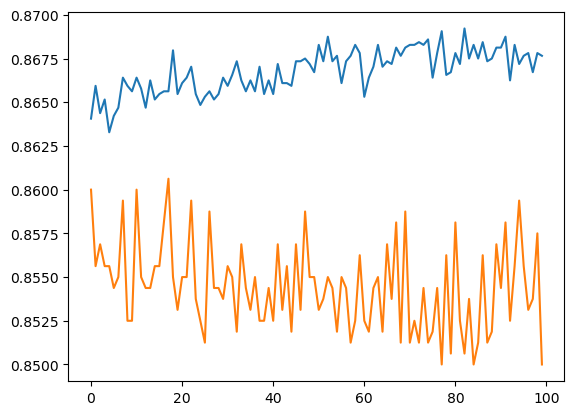

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])